In [1]:
!pip install tensorflow
!pip install keras

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=0cb2a6b81a20a0c702479c35436b067b667c48bef29c17a018a0e927ffbf0bab
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [2]:
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Stock Market Prediction\dataset.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [19]:
df1=df.reset_index()['Close']

In [23]:
df1

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

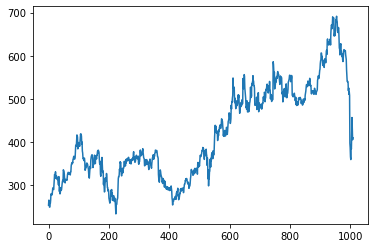

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
import numpy as np

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [28]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(655, 354)

In [30]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [31]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train.shape), print(y_train.shape)

(554, 100)
(554,)


(None, None)

In [33]:
print(X_test.shape), print(ytest.shape)

(253, 100)
(253,)


(None, None)

In [34]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 17s 560ms/step - loss: 0.0368 - val_loss: 0.0192
Epoch 2/100
9/9 [==============================] - 2s 244ms/step - loss: 0.0087 - val_loss: 0.0450
Epoch 3/100
9/9 [==============================] - 2s 240ms/step - loss: 0.0063 - val_loss: 0.0124
Epoch 4/100
9/9 [==============================] - 2s 232ms/step - loss: 0.0044 - val_loss: 0.0118
Epoch 5/100
9/9 [==============================] - 2s 243ms/step - loss: 0.0034 - val_loss: 0.0083
Epoch 6/100
9/9 [==============================] - 2s 224ms/step - loss: 0.0030 - val_loss: 0.0112
Epoch 7/100
9/9 [==============================] - 2s 225ms/step - loss: 0.0029 - val_loss: 0.0088
Epoch 8/100
9/9 [==============================] - 2s 223ms/step - loss: 0.0028 - val_loss: 0.0133
Epoch 9/100
9/9 [==============================] - 2s 223ms/step - loss: 0.0028 - val_loss: 0.0069
Epoch 10/100
9/9 [==============================] - 2s 221ms/step - loss: 0.0027 - val_loss: 0.0083
Epoch 11

9/9 [==============================] - 2s 224ms/step - loss: 7.0850e-04 - val_loss: 0.0020
Epoch 83/100
9/9 [==============================] - 2s 219ms/step - loss: 7.7616e-04 - val_loss: 0.0019
Epoch 84/100
9/9 [==============================] - 2s 222ms/step - loss: 7.9554e-04 - val_loss: 0.0029
Epoch 85/100
9/9 [==============================] - 2s 223ms/step - loss: 7.2040e-04 - val_loss: 0.0020
Epoch 86/100
9/9 [==============================] - 2s 223ms/step - loss: 6.5826e-04 - val_loss: 0.0026
Epoch 87/100
9/9 [==============================] - 2s 251ms/step - loss: 6.6722e-04 - val_loss: 0.0021
Epoch 88/100
9/9 [==============================] - 2s 255ms/step - loss: 6.2881e-04 - val_loss: 0.0021
Epoch 89/100
9/9 [==============================] - 2s 246ms/step - loss: 6.7043e-04 - val_loss: 0.0030
Epoch 90/100
9/9 [==============================] - 2s 222ms/step - loss: 6.8171e-04 - val_loss: 0.0021
Epoch 91/100
9/9 [==============================] - 2s 221ms/step - loss: 6.5

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.9.1'

In [42]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 48ms/step


In [43]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

357.9914729514776

In [45]:
math.sqrt(mean_squared_error(ytest,test_predict))

546.3650026352805

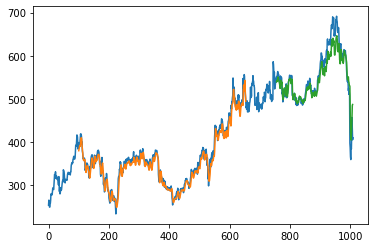

In [46]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

354

In [48]:
x_input=test_data[254:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44757634]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0

8 day output [[0.65340906]]
9 day input [0.76444371 0.79766714 0.82230625 0.82844416 0.8070378  0.87575631
 0.88512696 0.8692907  0.87105998 0.85878416 0.85419716 0.86472556
 0.87355013 0.86151455 0.88265868 0.88490858 0.85463405 0.91583838
 0.94122022 0.95624816 0.94938952 0.93715729 0.9614687  0.99698564
 0.97702099 0.96948509 0.99257329 0.94912741 0.8995871  0.9121033
 0.92202003 0.90218643 0.92549314 0.98016641 0.97300193 0.99062935
 1.         0.97887774 0.97184418 0.92903172 0.91780432 0.92704392
 0.94309869 0.93916696 0.89124314 0.83853568 0.83569596 0.804373
 0.82743933 0.85559515 0.86105593 0.82374784 0.82518942 0.80968086
 0.79532991 0.81072929 0.78019265 0.77073453 0.78604659 0.81046718
 0.83082499 0.83049742 0.82837857 0.82311443 0.82274301 0.8261288
 0.80505013 0.79397565 0.78038929 0.72877398 0.69769113 0.67097703
 0.66833397 0.67049655 0.66258921 0.623228   0.63740416 0.60487972
 0.61593233 0.59930975 0.35739716 0.33478952 0.28950877 0.27483019
 0.33380662 0.32869527 0.4

16 day output [[0.6661382]]
17 day input [0.87105998 0.85878416 0.85419716 0.86472556 0.87355013 0.86151455
 0.88265868 0.88490858 0.85463405 0.91583838 0.94122022 0.95624816
 0.94938952 0.93715729 0.9614687  0.99698564 0.97702099 0.96948509
 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003 0.90218643
 0.92549314 0.98016641 0.97300193 0.99062935 1.         0.97887774
 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869 0.93916696
 0.89124314 0.83853568 0.83569596 0.804373   0.82743933 0.85559515
 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991 0.81072929
 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499 0.83049742
 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013 0.79397565
 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397 0.67049655
 0.66258921 0.623228   0.63740416 0.60487972 0.61593233 0.59930975
 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662 0.32869527
 0.42214021 0.48764772 0.4272515  0.37509011 0.38507243 0.44757634
 0.45616198 0.4873754

24 day output [[0.57443285]]
25 day input [0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0.59930975 0.35739716 0.33478952
 0.28950877 0.27483019 0.33380662 0.32869527 0.42214021 0.48764772
 0.4272515  0.37509011 0.38507243 0.44757634 0.45616198 0.48737544
 0.52316636 0.5579775  0.58971435 0.61683643 0.6382041  0.65340906
 0.66288787 0.6677568 

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

1009

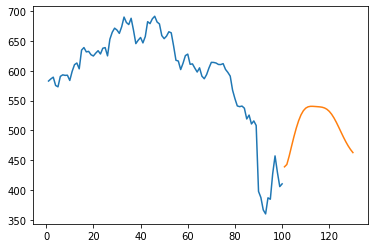

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

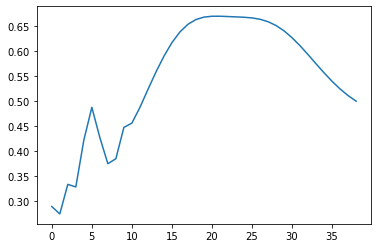

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

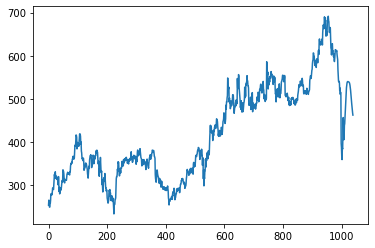

In [59]:
plt.plot(df3)